In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
df = pd.concat([train, test], ignore_index=True, sort = False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [5]:
df.nunique()

Id               2919
MSSubClass         16
MSZoning            5
LotFrontage       128
LotArea          1951
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

## Outliers

In [6]:
df.corr()['SalePrice'].sort_values(ascending=False)[1:]

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [7]:
features = df.corr()['SalePrice'].sort_values(ascending=False)[1:].index

In [8]:
len(features)

37

In [9]:
target_column = 'SalePrice'

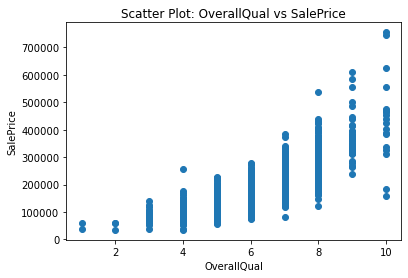

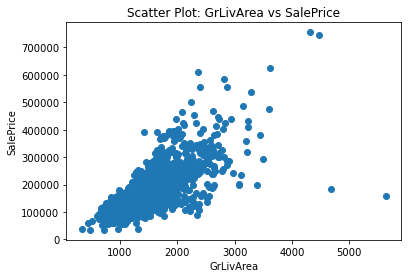

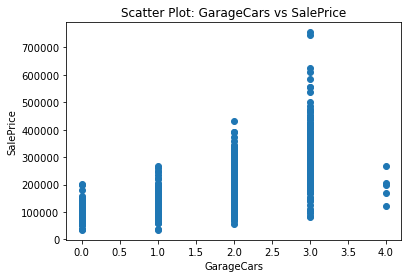

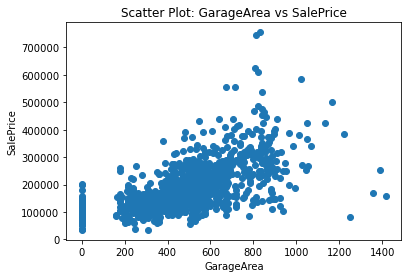

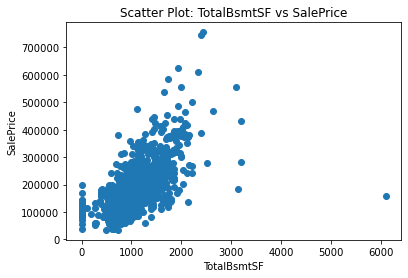

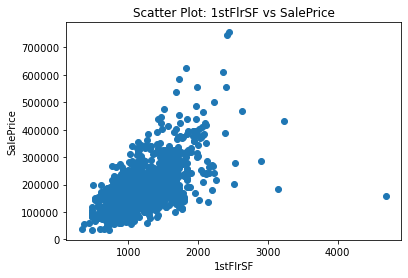

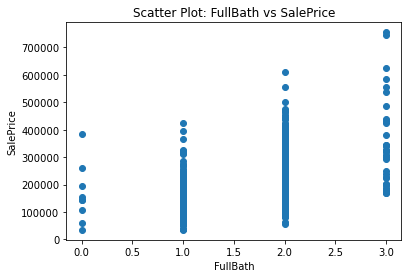

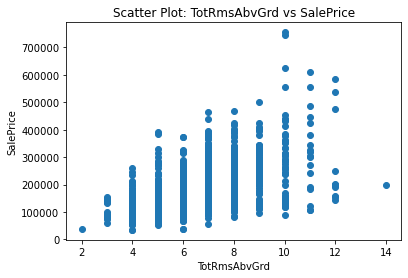

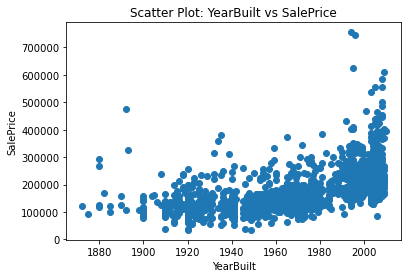

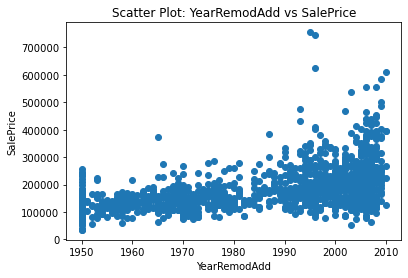

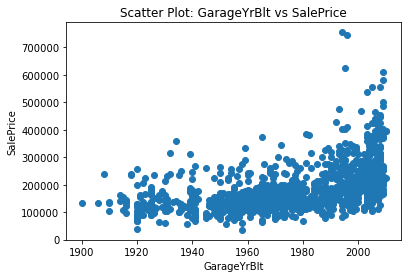

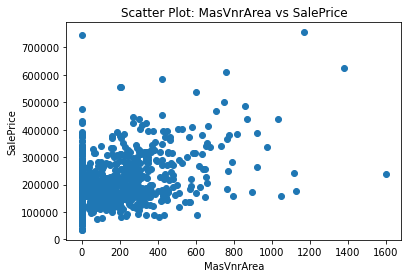

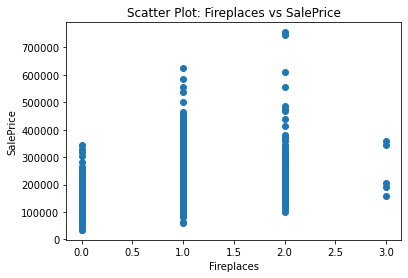

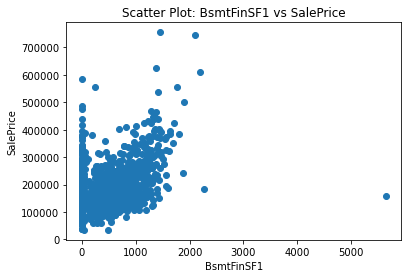

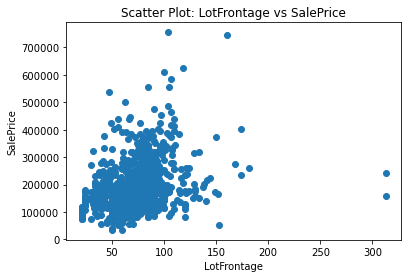

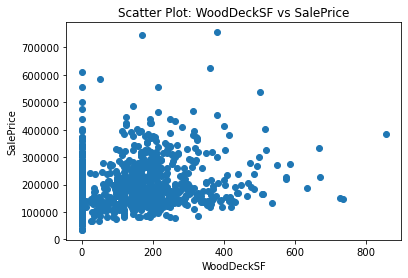

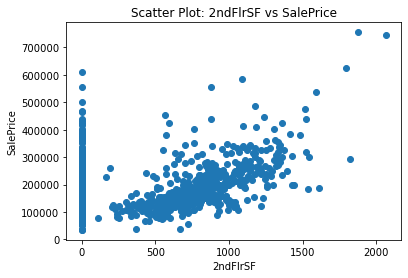

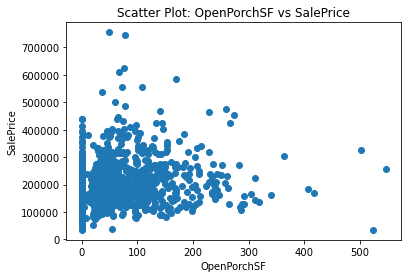

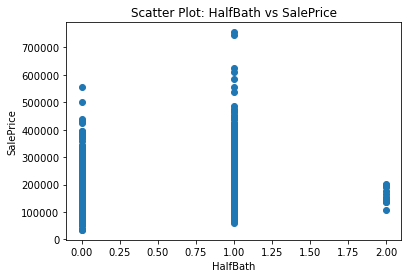

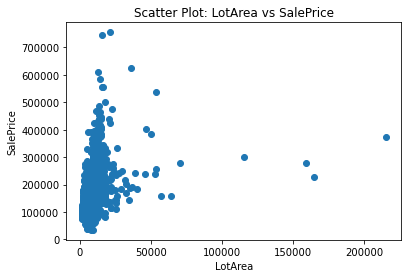

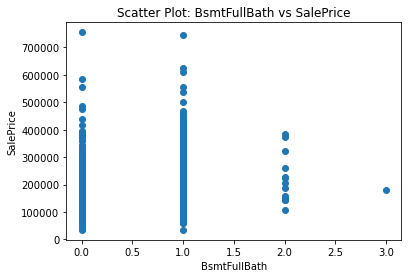

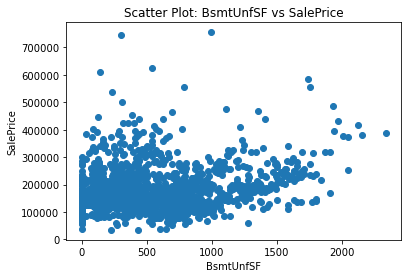

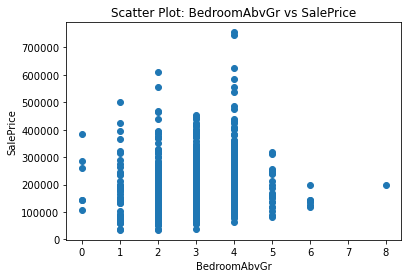

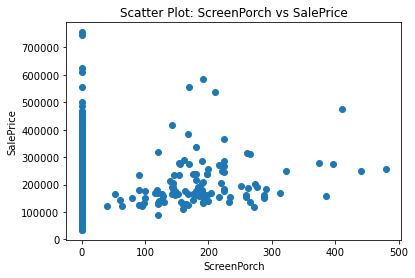

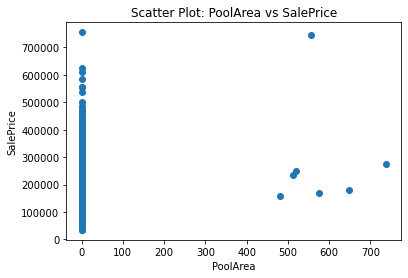

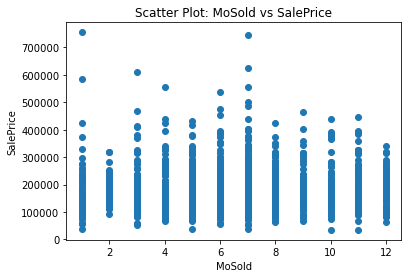

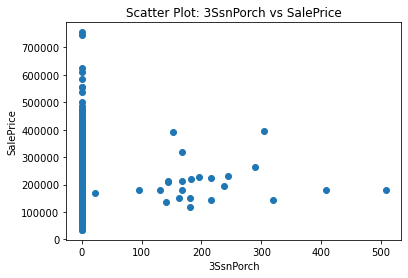

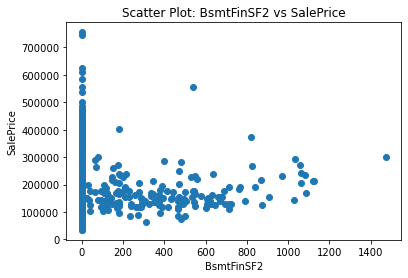

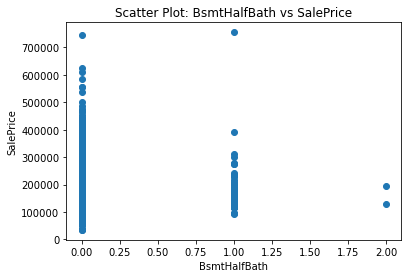

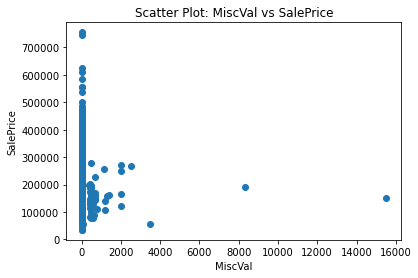

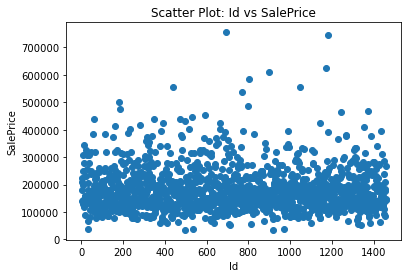

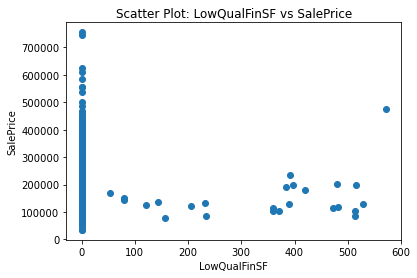

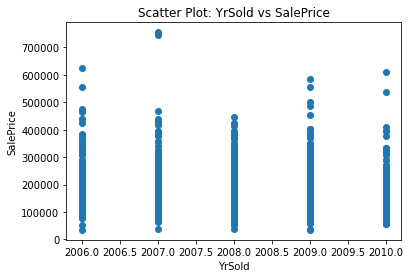

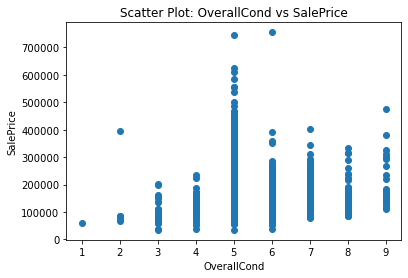

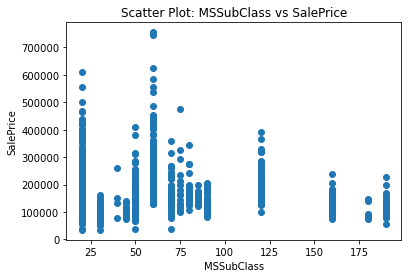

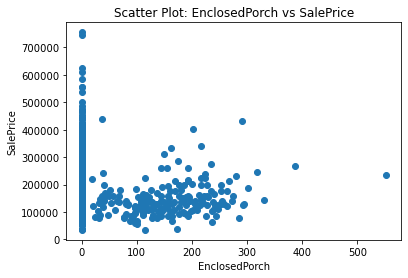

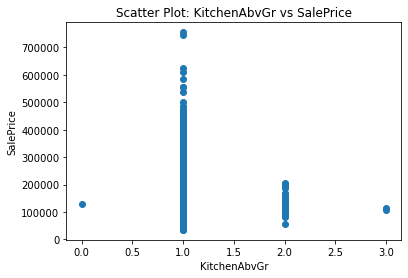

In [10]:
for feature in features:
    plt.scatter(df[feature], df[target_column])
    plt.title(f'Scatter Plot: {feature} vs {target_column}')
    plt.xlabel(feature)
    plt.ylabel(target_column)
    plt.show()

### OverallQual

In [11]:
df[(df['OverallQual']>8) & (df['SalePrice'] < 200000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750.0
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000.0


In [12]:
### GrLivArea

In [13]:
df[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 200000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750.0
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000.0


In [14]:
drop_ind = df[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 200000)].index

In [15]:
df = df.drop(drop_ind, axis=0)

In [16]:
df[(df['GarageCars']==3) & (df['SalePrice'] > 700000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000.0
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000.0


In [17]:
df[(df['GarageArea'] > 1200) & (df['SalePrice'] < 300000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
581,582,20,RL,98.0,12704,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,New,Partial,253293.0
1061,1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,...,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000.0
1190,1191,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000.0


In [18]:
drop_ind = df[(df['GarageArea'] > 1200) & (df['SalePrice'] < 300000)].index

In [19]:
df = df.drop(drop_ind, axis=0)

In [20]:
len(df[df['GarageArea'] == 0])

157

In [21]:
one = df[(df['LotFrontage'] > 150) & (df['SalePrice'] < 100000)]

In [22]:
two = df[(df['LotFrontage'] > 300) & (df['SalePrice'] < 300000)]

In [23]:
drop_ind = pd.concat([one,two],axis=0).index

In [24]:
drop_ind

Int64Index([1337, 934], dtype='int64')

In [25]:
df = df.drop(drop_ind, axis=0)

In [26]:
df[(df['OpenPorchSF'] > 500) & (df['SalePrice'] < 100000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
495,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900.0


In [27]:
drop_ind = df[(df['OpenPorchSF'] > 500) & (df['SalePrice'] < 100000)].index

In [28]:
df = df.drop(drop_ind, axis=0)

In [29]:
df[df['PoolArea'] > 500]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000.0
810,811,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal,181000.0
1170,1171,80,RL,76.0,9880,Pave,NaN,Reg,Lvl,AllPub,...,576,Gd,GdPrv,NaN,0,7,2008,WD,Normal,171000.0
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000.0
1386,1387,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,...,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000.0
1423,1424,80,RL,NaN,19690,Pave,NaN,IR1,Lvl,AllPub,...,738,Gd,GdPrv,NaN,0,8,2006,WD,Alloca,274970.0
2599,2600,20,RL,200.0,43500,Pave,NaN,Reg,Lvl,AllPub,...,561,NaN,GdPrv,NaN,0,6,2007,WD,Normal,NaN
2710,2711,80,RL,100.0,14330,Pave,NaN,IR1,Low,AllPub,...,800,Gd,GdPrv,NaN,0,1,2006,WD,Normal,NaN


## Missing Data

### Deleting id

In [30]:
df = df.drop('Id', axis=1)

### Creating function for checking of the null columns

In [31]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [32]:
percent_nan = percent_missing(df)

In [33]:
percent_nan[::-1]

PoolQC          99.690828
MiscFeature     96.427345
Alley           93.232566
Fence           80.419100
SalePrice       50.120234
FireplaceQu     48.677430
LotFrontage     16.660941
GarageYrBlt      5.393336
GarageFinish     5.393336
GarageQual       5.393336
GarageCond       5.393336
GarageType       5.324631
BsmtCond         2.816901
BsmtExposure     2.816901
BsmtQual         2.782549
BsmtFinType2     2.748196
BsmtFinType1     2.713844
MasVnrType       0.824459
MasVnrArea       0.790106
MSZoning         0.137410
BsmtFullBath     0.068705
BsmtHalfBath     0.068705
Functional       0.068705
Utilities        0.068705
BsmtFinSF2       0.034352
BsmtUnfSF        0.034352
BsmtFinSF1       0.034352
TotalBsmtSF      0.034352
SaleType         0.034352
KitchenQual      0.034352
Exterior2nd      0.034352
Exterior1st      0.034352
GarageCars       0.034352
GarageArea       0.034352
Electrical       0.034352
dtype: float64

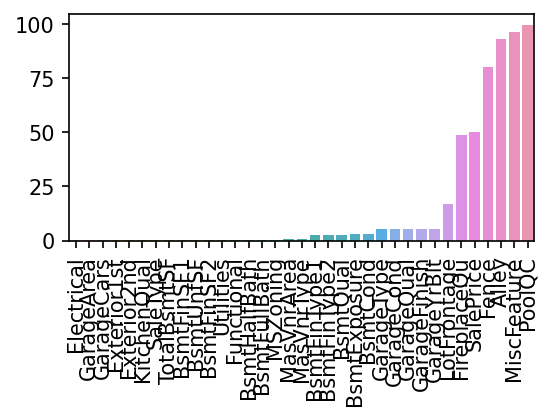

In [34]:
plt.figure(figsize=(4,2), dpi=150)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

(0.0, 1.0)

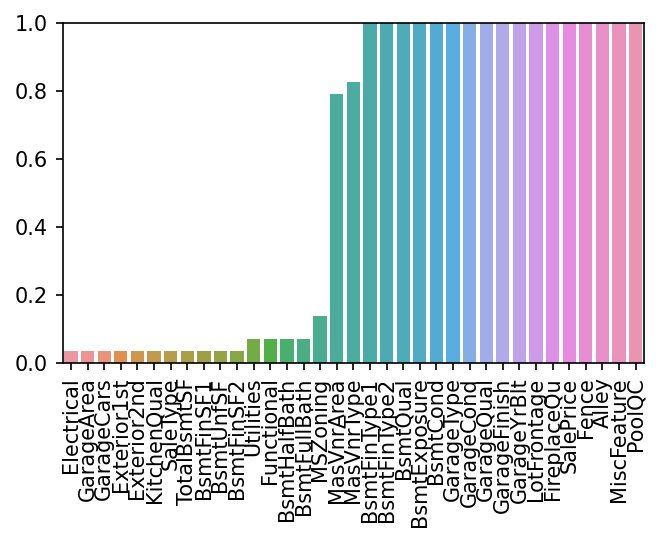

In [35]:
plt.figure(figsize=(5,3), dpi=150)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# Устанавливаем пороговое значение 1% 
plt.ylim(0,1)

In [36]:
percent_nan[percent_nan < 1]

Electrical      0.034352
GarageArea      0.034352
GarageCars      0.034352
Exterior1st     0.034352
Exterior2nd     0.034352
KitchenQual     0.034352
SaleType        0.034352
TotalBsmtSF     0.034352
BsmtFinSF1      0.034352
BsmtUnfSF       0.034352
BsmtFinSF2      0.034352
Utilities       0.068705
Functional      0.068705
BsmtHalfBath    0.068705
BsmtFullBath    0.068705
MSZoning        0.137410
MasVnrArea      0.790106
MasVnrType      0.824459
dtype: float64

In [37]:
100/len(df)

0.034352456200618345

In [38]:
df[df['Electrical'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500.0


In [39]:
df = df.dropna(axis=0,subset= ['Electrical','GarageArea'])

In [40]:
percent_nan = percent_missing(df)

In [41]:
percent_nan[percent_nan < 1]

BsmtUnfSF       0.034376
KitchenQual     0.034376
Exterior1st     0.034376
Exterior2nd     0.034376
TotalBsmtSF     0.034376
SaleType        0.034376
BsmtFinSF2      0.034376
BsmtFinSF1      0.034376
Functional      0.068752
Utilities       0.068752
BsmtHalfBath    0.068752
BsmtFullBath    0.068752
MSZoning        0.137504
MasVnrArea      0.790650
MasVnrType      0.825026
dtype: float64

(0.0, 1.0)

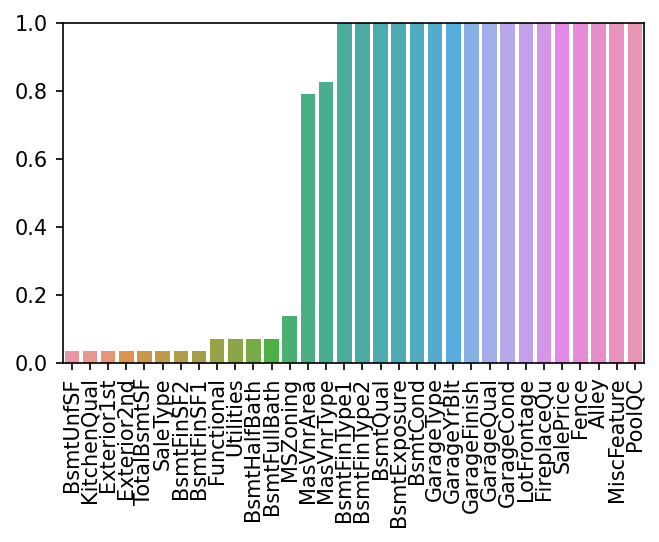

In [42]:
plt.figure(figsize=(5,3), dpi=150)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# Устанавливаем пороговое значение 1% 
plt.ylim(0,1)

In [43]:
df[df['BsmtHalfBath'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,NaN
2188,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,NaN


In [44]:
df[df['BsmtFullBath'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,NaN
2188,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,NaN


In [45]:
df[df['BsmtUnfSF'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,NaN


In [46]:
bsmt_num_cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

In [47]:
bsmt_str_cols =  ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [48]:
df[df['BsmtHalfBath'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [49]:
percent_nan = percent_missing(df)

(0.0, 1.0)

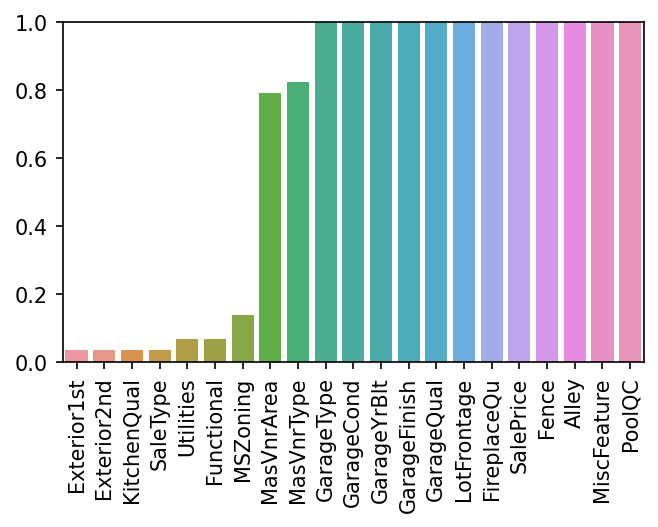

In [50]:
plt.figure(figsize=(5,3), dpi=150)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# Устанавливаем пороговое значение 1% 
plt.ylim(0,1)

In [51]:
df["MasVnrType"] = df["MasVnrType"].fillna("None")
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)

In [52]:
percent_nan = percent_missing(df)

(0.0, 1.0)

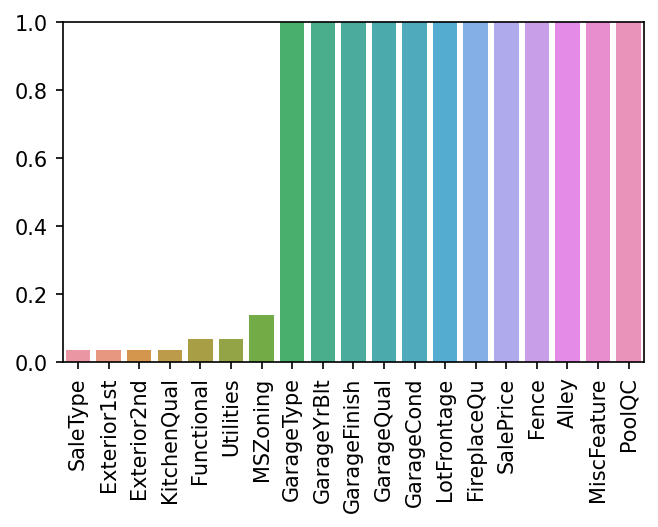

In [53]:
plt.figure(figsize=(5,3), dpi=150)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# Устанавливаем пороговое значение 1% 
plt.ylim(0,1)

In [54]:
df[df['SaleType'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2489,20,RL,85.0,13770,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,10,2007,NaN,Normal,NaN


In [55]:
df['SaleType'].value_counts()

WD       2519
New       236
COD        87
ConLD      25
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [56]:
df['SaleType'] = df['SaleType'].fillna('Oth')

In [57]:
df[df['Exterior1st'].isnull()]['Exterior2nd']

2151    NaN
Name: Exterior2nd, dtype: object

In [58]:
df['Exterior1st'] = df['Exterior1st'].fillna('Other')
df['Exterior2nd'] = df['Exterior2nd'].fillna('Other')

In [59]:
percent_nan = percent_missing(df)

(0.0, 1.0)

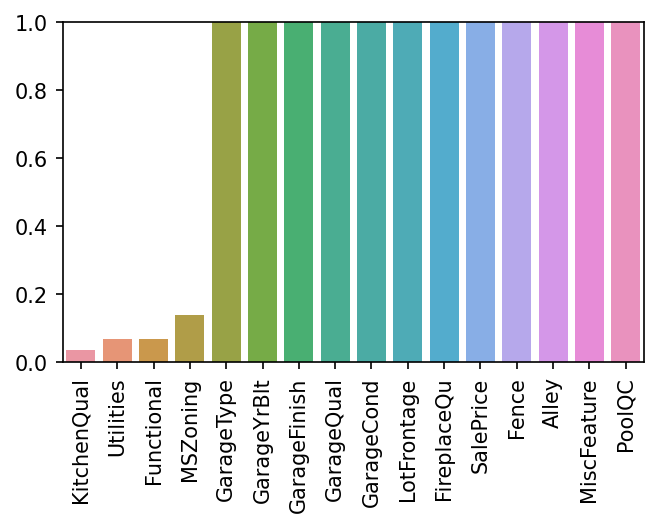

In [60]:
plt.figure(figsize=(5,3), dpi=150)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# Устанавливаем пороговое значение 1% 
plt.ylim(0,1)

In [61]:
df['KitchenQual'].value_counts()

TA    1489
Gd    1148
Ex     202
Fa      69
Name: KitchenQual, dtype: int64

### Filling KitchenQual by None value

In [62]:
df['KitchenQual'] = df['KitchenQual'].fillna('None')

In [63]:
df['Utilities'].value_counts()

AllPub    2906
NoSeWa       1
Name: Utilities, dtype: int64

### Filling Utilities by modal value

In [64]:
df['Utilities'] = df['Utilities'].fillna(df['Utilities'].mode()[0])

In [65]:
df[df['Functional'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2216,20,NaN,80.0,14584,Pave,NaN,Reg,Low,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml,NaN
2473,50,RM,60.0,10320,Pave,Grvl,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,9,2007,COD,Abnorml,NaN


In [66]:
df['Functional'].value_counts()

Typ     2707
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

### Filling Functional by None value

In [67]:
df['Functional'] = df['Functional'].fillna('None')

In [68]:
df[df['MSZoning'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1915,30,NaN,109.0,21780,Grvl,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2009,ConLD,Normal,NaN
2216,20,NaN,80.0,14584,Pave,NaN,Reg,Low,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml,NaN
2250,70,NaN,NaN,56600,Pave,NaN,IR1,Low,AllPub,Inside,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,NaN
2904,20,NaN,125.0,31250,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,NaN


In [69]:
df['MSZoning'].value_counts()

RL         2259
RM          458
FV          139
RH           26
C (all)      23
Name: MSZoning, dtype: int64

### Filling Functional by None value

In [70]:
df['MSZoning'] = df['MSZoning'].fillna('None')

(0.0, 1.0)

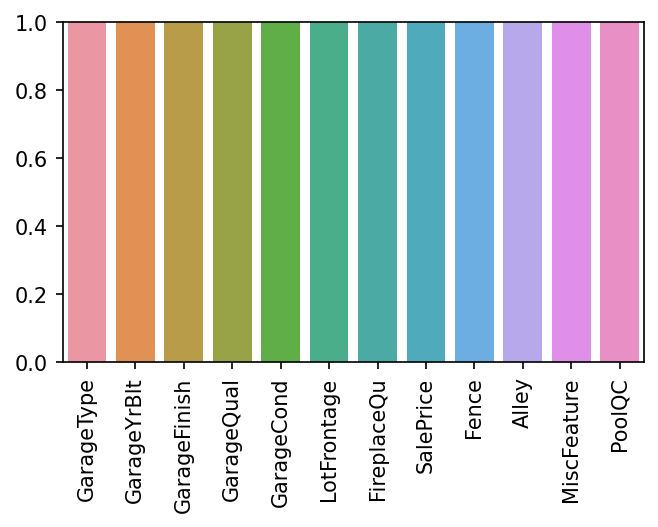

In [71]:
percent_nan = percent_missing(df)

plt.figure(figsize=(5,3), dpi=150)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# Устанавливаем пороговое значение 1% 
plt.ylim(0,1)

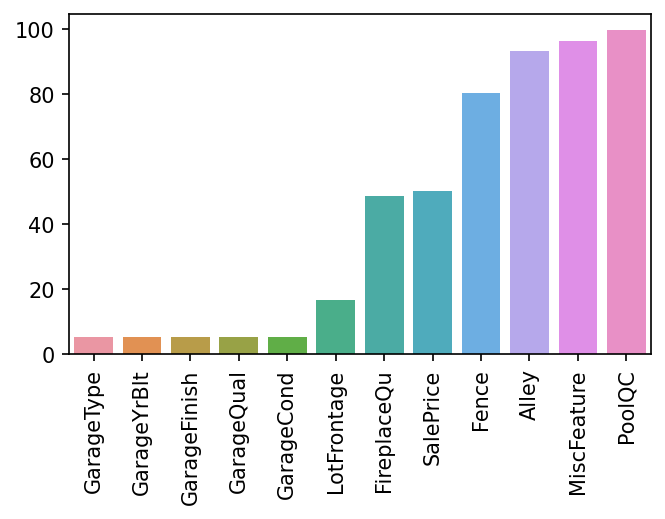

In [72]:
plt.figure(figsize=(5,3), dpi=150)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [73]:
gar_str_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
df[gar_str_cols] = df[gar_str_cols].fillna('No Garage')

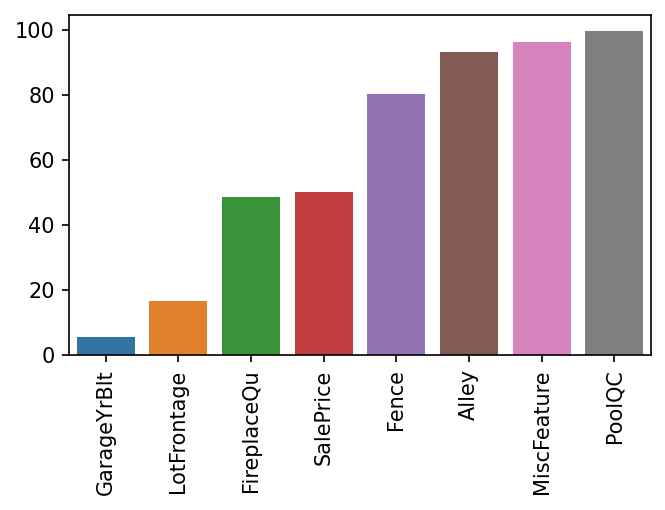

In [74]:
percent_nan = percent_missing(df)
plt.figure(figsize=(5,3), dpi=150)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [75]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

### Deleting columns

In [76]:
df = df.drop(['Fence', 'Alley', 'MiscFeature', 'PoolQC'], axis=1)

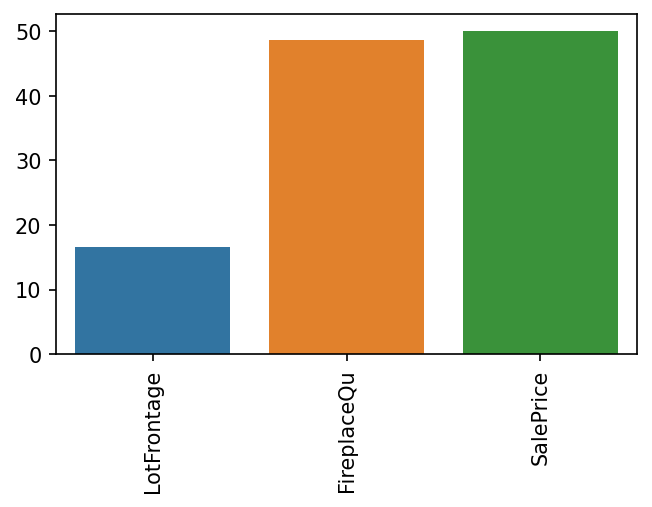

In [77]:
percent_nan = percent_missing(df)
plt.figure(figsize=(5,3), dpi=150)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [78]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')

In [79]:
df['LotFrontage'].value_counts()

60.0     275
80.0     137
70.0     133
50.0     116
75.0     105
        ... 
111.0      1
138.0      1
182.0      1
168.0      1
133.0      1
Name: LotFrontage, Length: 126, dtype: int64

In [80]:
df['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

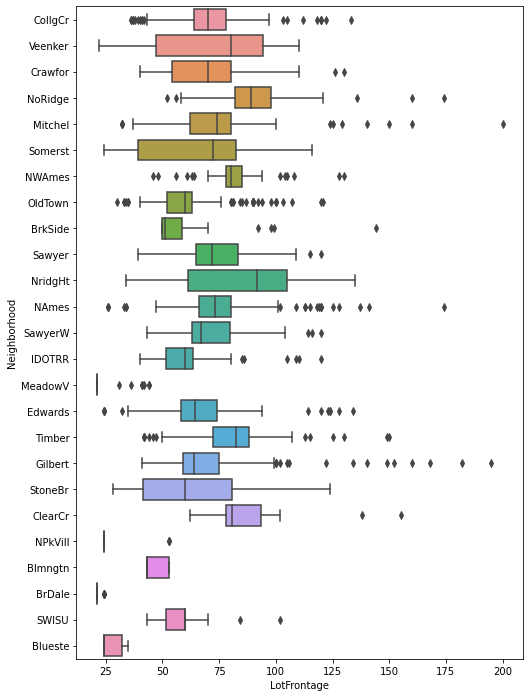

In [81]:
plt.figure(figsize=(8,12))
sns.boxplot(x='LotFrontage',y='Neighborhood',data=df,orient='h');

In [82]:
df.groupby('Neighborhood')['LotFrontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    65.153409
Gilbert    74.207207
IDOTRR     61.726190
MeadowV    25.606061
Mitchel    75.144444
NAmes      74.574866
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.098765
OldTown    61.377193
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: LotFrontage, dtype: float64

In [83]:
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda val: val.fillna(val.mean()))

In [84]:
df['LotFrontage'].isnull().sum()

0

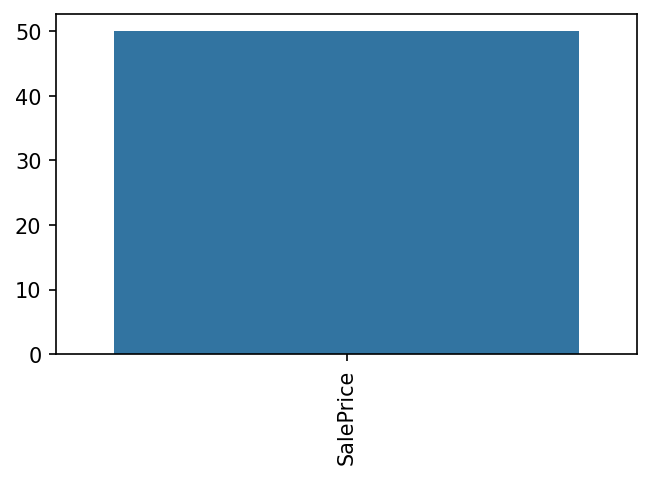

In [85]:
percent_nan = percent_missing(df)
plt.figure(figsize=(5,3), dpi=150)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

## Outliers

In [86]:
df.corr()['SalePrice'].sort_values(ascending=False)[1:]

OverallQual      0.795311
GrLivArea        0.733450
TotalBsmtSF      0.652378
GarageCars       0.643750
GarageArea       0.639904
1stFlrSF         0.631105
FullBath         0.560826
TotRmsAbvGrd     0.535689
YearBuilt        0.521975
YearRemodAdd     0.504756
MasVnrArea       0.477490
GarageYrBlt      0.474217
Fireplaces       0.468256
BsmtFinSF1       0.410510
LotFrontage      0.387023
OpenPorchSF      0.336870
WoodDeckSF       0.325680
2ndFlrSF         0.320325
HalfBath         0.283276
LotArea          0.268660
BsmtFullBath     0.226921
BsmtUnfSF        0.214409
BedroomAbvGr     0.164832
ScreenPorch      0.111153
PoolArea         0.099653
MoSold           0.046289
3SsnPorch        0.044438
BsmtFinSF2      -0.012132
BsmtHalfBath    -0.017497
MiscVal         -0.020503
LowQualFinSF    -0.025985
YrSold          -0.029970
OverallCond     -0.082464
MSSubClass      -0.085556
EnclosedPorch   -0.127637
KitchenAbvGr    -0.136877
Name: SalePrice, dtype: float64

In [87]:
features = df.corr()['SalePrice'].sort_values(ascending=False)[1:].index

In [88]:
len(features)

36

In [89]:
target_column = 'SalePrice'

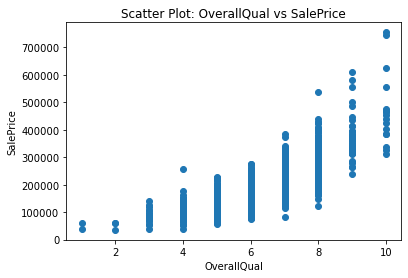

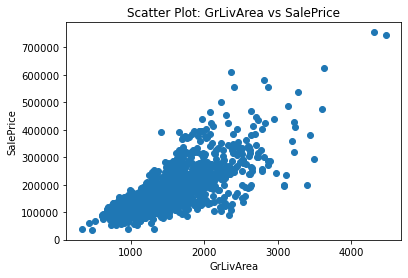

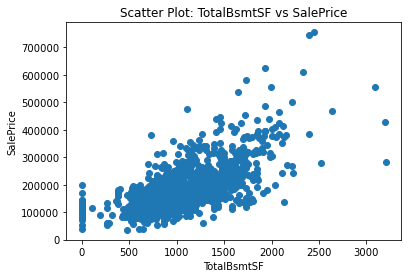

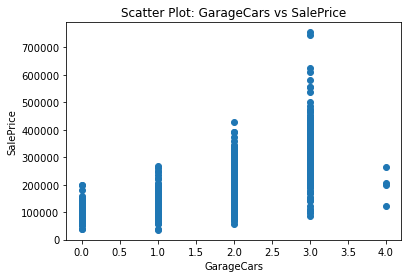

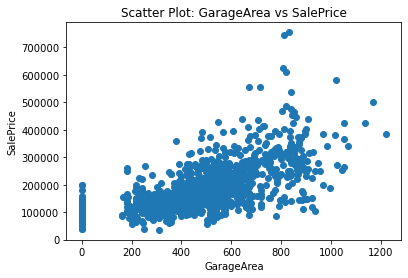

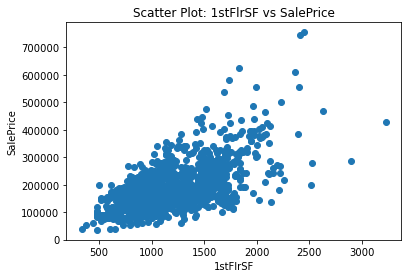

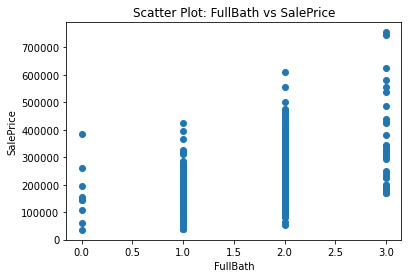

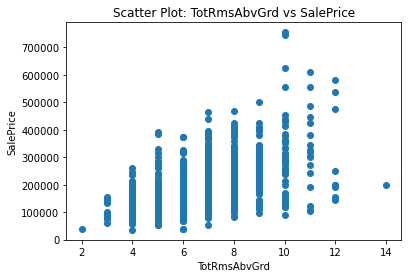

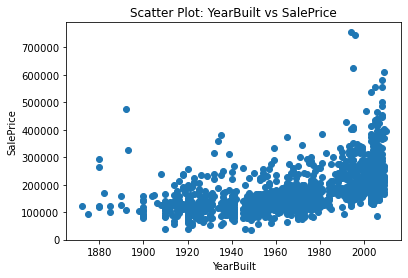

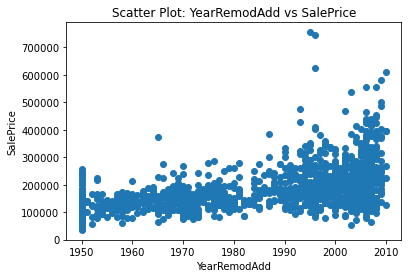

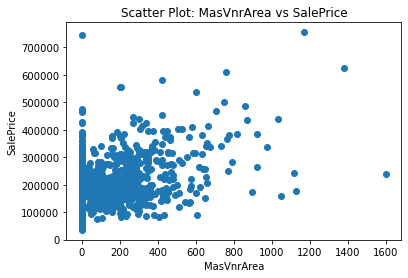

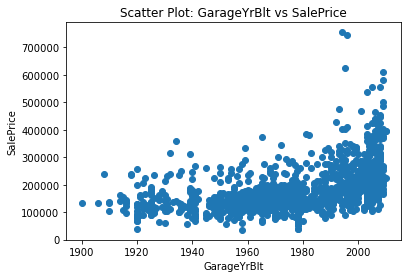

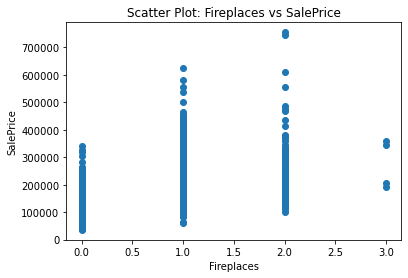

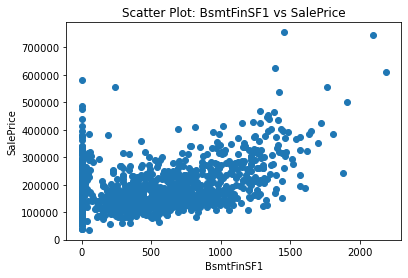

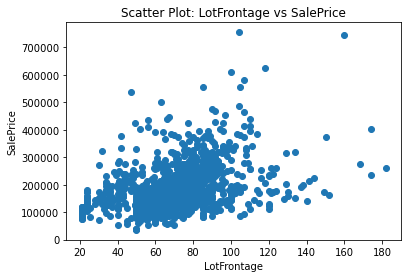

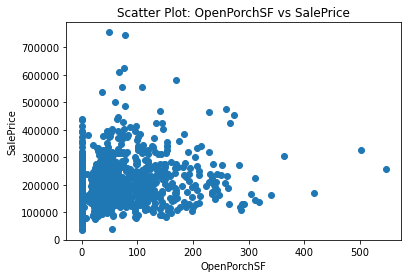

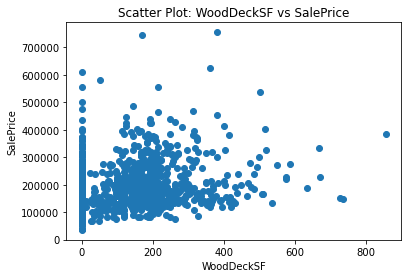

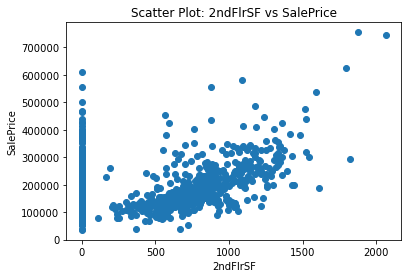

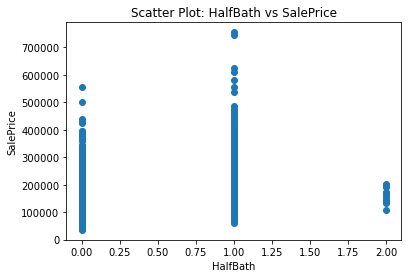

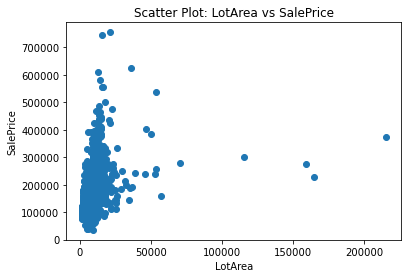

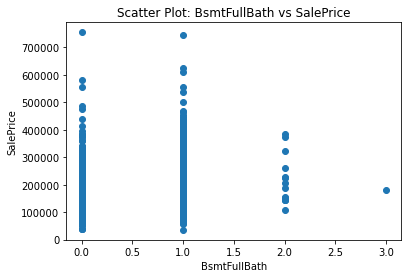

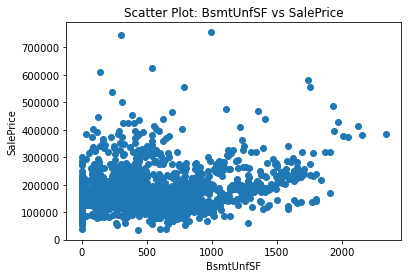

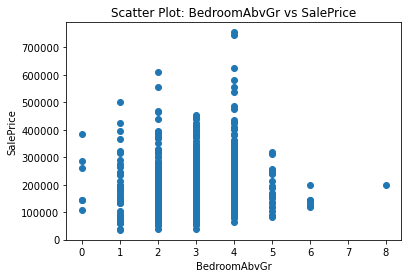

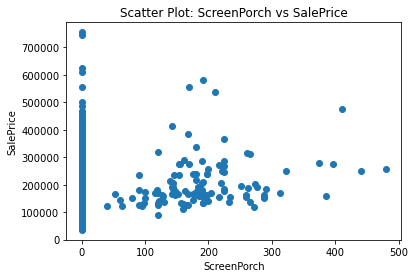

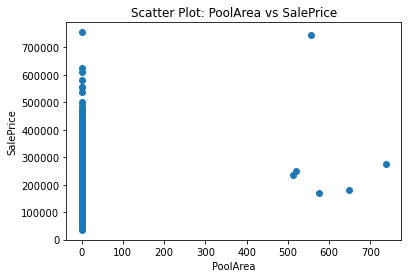

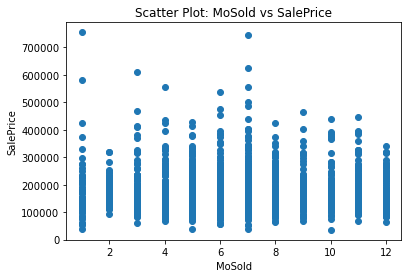

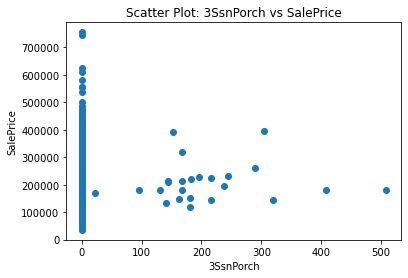

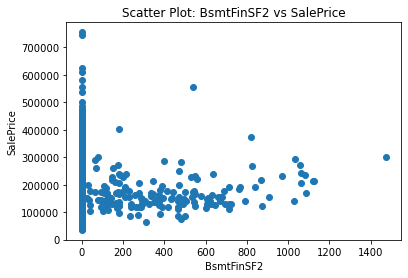

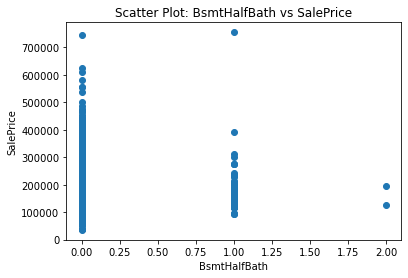

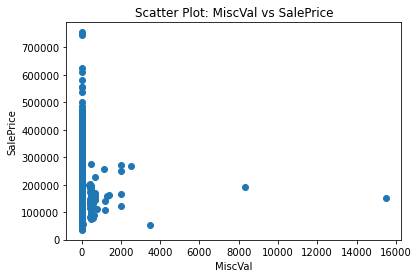

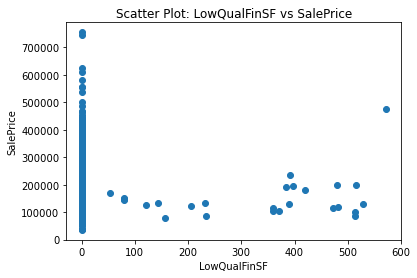

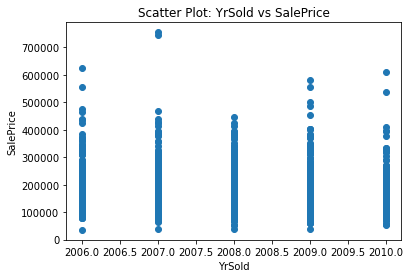

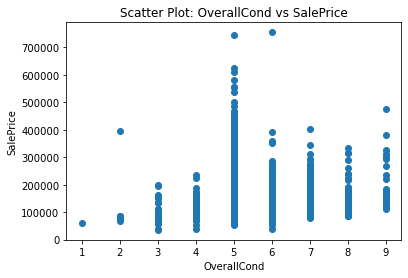

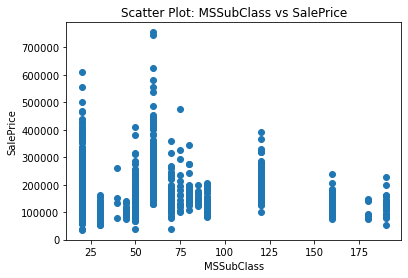

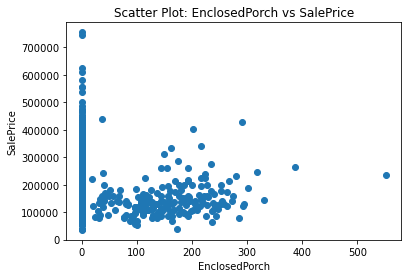

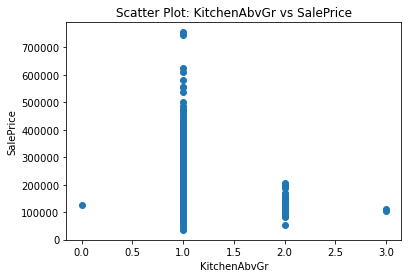

In [90]:
for feature in features:
    plt.scatter(df[feature], df[target_column])
    plt.title(f'Scatter Plot: {feature} vs {target_column}')
    plt.xlabel(feature)
    plt.ylabel(target_column)
    plt.show()

### OverallQual

In [91]:
df[(df['OverallQual']>8) & (df['SalePrice'] < 200000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


### GrLivArea

In [92]:
df[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 200000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [93]:
drop_ind = df[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 200000)].index

In [94]:
df = df.drop(drop_ind, axis=0)

In [95]:
df[(df['GarageCars']==3) & (df['SalePrice'] > 700000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,60,RL,104.0,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2007,WD,Normal,755000.0
1182,60,RL,160.0,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,555,0,7,2007,WD,Abnorml,745000.0


In [96]:
df[(df['GarageArea'] > 1200) & (df['SalePrice'] < 300000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [97]:
drop_ind = df[(df['GarageArea'] > 1200) & (df['SalePrice'] < 300000)].index

In [98]:
df = df.drop(drop_ind, axis=0)

In [99]:
len(df[df['GarageArea'] == 0])

155

In [100]:
one = df[(df['LotFrontage'] > 150) & (df['SalePrice'] < 100000)]

In [101]:
two = df[(df['LotFrontage'] > 300) & (df['SalePrice'] < 300000)]

In [102]:
drop_ind = pd.concat([one,two],axis=0).index

In [103]:
drop_ind

Int64Index([], dtype='int64')

In [104]:
df = df.drop(drop_ind, axis=0)

In [105]:
df[(df['OpenPorchSF'] > 500) & (df['SalePrice'] < 100000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [106]:
drop_ind = df[(df['OpenPorchSF'] > 500) & (df['SalePrice'] < 100000)].index

In [107]:
df = df.drop(drop_ind, axis=0)

In [108]:
df[df['PoolArea'] > 500]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,75,RL,174.000000,25419,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,552,0,0,512,0,3,2006,WD,Abnorml,235000.0
810,20,RL,78.000000,10140,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,648,0,1,2006,WD,Normal,181000.0
1170,80,RL,76.000000,9880,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,576,0,7,2008,WD,Normal,171000.0
1182,60,RL,160.000000,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,555,0,7,2007,WD,Abnorml,745000.0
1386,60,RL,80.000000,16692,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,440,519,2000,7,2006,WD,Normal,250000.0
1423,80,RL,65.153409,19690,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,738,0,8,2006,WD,Alloca,274970.0
2599,20,RL,200.000000,43500,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,561,0,6,2007,WD,Normal,NaN
2710,80,RL,100.000000,14330,Pave,IR1,Low,AllPub,Corner,Gtl,...,0,0,0,800,0,1,2006,WD,Normal,NaN


## Categorial variables

In [109]:
df['MSSubClass'] = df['MSSubClass'].apply(str)

In [110]:
df['MSSubClass'].value_counts()

20     1077
60      573
50      287
120     182
30      136
160     128
70      127
80      117
90      109
190      60
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

In [111]:
df.select_dtypes(include='object')

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Gd,Typ,None,Attchd,RFn,TA,TA,Y,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,TA,Typ,None,No Garage,No Garage,No Garage,No Garage,Y,WD,Normal
2915,160,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,TA,Typ,None,CarPort,Unf,TA,TA,Y,WD,Abnorml
2916,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,TA,Typ,TA,Detchd,Unf,TA,TA,Y,WD,Abnorml
2917,85,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,TA,Typ,None,No Garage,No Garage,No Garage,No Garage,Y,WD,Normal


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2909 entries, 0 to 2918
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2909 non-null   object 
 1   MSZoning       2909 non-null   object 
 2   LotFrontage    2909 non-null   float64
 3   LotArea        2909 non-null   int64  
 4   Street         2909 non-null   object 
 5   LotShape       2909 non-null   object 
 6   LandContour    2909 non-null   object 
 7   Utilities      2909 non-null   object 
 8   LotConfig      2909 non-null   object 
 9   LandSlope      2909 non-null   object 
 10  Neighborhood   2909 non-null   object 
 11  Condition1     2909 non-null   object 
 12  Condition2     2909 non-null   object 
 13  BldgType       2909 non-null   object 
 14  HouseStyle     2909 non-null   object 
 15  OverallQual    2909 non-null   int64  
 16  OverallCond    2909 non-null   int64  
 17  YearBuilt      2909 non-null   int64  
 18  YearRemo

In [113]:
my_object_df = df.select_dtypes(include='object')

In [114]:
my_numeric_df = df.select_dtypes(exclude='object')

In [115]:
df_object_dummies = pd.get_dummies(my_object_df, drop_first=True)

In [116]:
df_object_dummies

,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2915,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2916,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [117]:
final_df = pd.concat([my_numeric_df,my_object_df],axis=1)

In [118]:
final_df['SalePrice'].isnull().sum()

1458

In [119]:
final_df.corr()['SalePrice'].sort_values(ascending=False)[1:]

OverallQual      0.795311
GrLivArea        0.733450
TotalBsmtSF      0.652378
GarageCars       0.643750
GarageArea       0.639904
1stFlrSF         0.631105
FullBath         0.560826
TotRmsAbvGrd     0.535689
YearBuilt        0.521975
YearRemodAdd     0.504756
MasVnrArea       0.477490
GarageYrBlt      0.474217
Fireplaces       0.468256
BsmtFinSF1       0.410510
LotFrontage      0.387023
OpenPorchSF      0.336870
WoodDeckSF       0.325680
2ndFlrSF         0.320325
HalfBath         0.283276
LotArea          0.268660
BsmtFullBath     0.226921
BsmtUnfSF        0.214409
BedroomAbvGr     0.164832
ScreenPorch      0.111153
PoolArea         0.099653
MoSold           0.046289
3SsnPorch        0.044438
BsmtFinSF2      -0.012132
BsmtHalfBath    -0.017497
MiscVal         -0.020503
LowQualFinSF    -0.025985
YrSold          -0.029970
OverallCond     -0.082464
EnclosedPorch   -0.127637
KitchenAbvGr    -0.136877
Name: SalePrice, dtype: float64